## 目標
利用k-means演算法訓練模型將Universal Bank客戶分群成「會貸款」和「不會貸款」，以利Universal Bank預測哪類型的人貸款機率比較高

## 資料
Universal Bank 客戶資料

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [22]:
store_data = pd.read_csv('/Users/owner/Desktop/Github/School_project/Clustering/UniversalBank.csv')

In [24]:
store_data.head(10)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [25]:
# 查看有缺失值的欄位
store_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [26]:
# 查看資料型態
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## 看看資料間的關連性

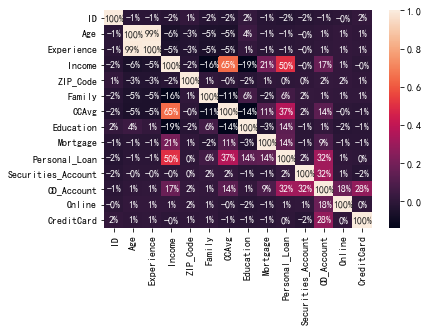

In [32]:
# 相關係數Heatmap
st_cor = store_data.corr()
sns.heatmap(st_cor, robust = True, annot = True, fmt = ".0%")

觀察到：
* CCAvg（每月平均信用卡花費）和Income相關係數0.65
* Personal_Loan和Income相關係數0.5
* Personal_Loan和CCAvg相關係數0.37
* Personal_Loan和CD_Account相關係數0.37

選擇比較會影響Personal_Loan的feature --> 'Income', 'CCAvg', 'Education', 'Mortgage', 'CD_Account'

## 跑k-means

In [66]:
#決定自變數、應變數
x = store_data[['Income', 'CCAvg', 'Education', 'Mortgage', 'CD_Account']]
y = store_data['Personal_Loan']

In [67]:
x = np.array(x)
y = np.array(y)

In [68]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.765


## Scaling --> feature範圍差太多

In [70]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.8802


分群準確度有明顯提升